##                  Model Assignment for Lasso and Ridge  calculation

###  House Price Prediction

* A US-based housing company named Surprise Housing has decided to enter the Australian market. 
* The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
* For the same purpose, the company has collected a data set from the sale of houses in Australia. 

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


### Step 1
Reading and uderstading the housing data 
* Look for data shape and size
* Look for missing values or null values
* Look for how data is described

In [2]:
housing_df = pd.read_csv("train.csv")

In [3]:
housing_df.shape

(1460, 81)

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Total we have 1460 rows and 81 columns 

In [6]:
housing_df['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [7]:
housing_df[housing_df['Alley'].isnull() == False]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


In [8]:
housing_df[housing_df['GarageType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [9]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Check if any of the ID is dupicated in Excel or data
housing_df[housing_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### No duplicated data and going further we can drop few columns which is not impacting Sales Price of House. we need to find those columns first. So let's begin...

###  Step 2: Data Cleaning 
* Data Imputation
    - Categotrical and Numerical Data
    - Replace Null Values or drop columns

In [11]:
# let's check the percentage of nuls 

null_percentage = round(100 * housing_df.isnull().sum()/len(housing_df.index), 2)

null_percentage.head()

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage    17.74
LotArea         0.00
dtype: float64

In [12]:
# Get all the Columns having any null values 
null_percentage[null_percentage > 0.00]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [13]:
null_percentage.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
housing_df["LotFrontage"]

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [15]:
housing_df.value_counts(['LotFrontage'])

LotFrontage
60.0           143
70.0            70
80.0            69
50.0            57
75.0            53
              ... 
38.0             1
39.0             1
111.0            1
112.0            1
128.0            1
Length: 110, dtype: int64

In [16]:
# The null values calclulated have both Categorical and Numberical columns 
# Also, as per the data dictionary the categorical values having NaN means those features are not present or available
# in or around the house hence it may impact the SalesPrice of those houses 

# We also need to impute the categorial and numerical data separately.

categorical_columns_null_data = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

numerical_columns_null_data = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]


In [17]:
for col in  categorical_columns_null_data:
    housing_df[col].fillna("None", inplace=True)

In [18]:
# Check the null percentage again and this time only numerical columns should be present
null_percentage = round(100 * housing_df.isnull().sum()/len(housing_df.index), 2)
null_percentage[null_percentage > 0]


LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [19]:
# We can not drop these columns two reasons, null values is not that much significant and moreover these features as per
# data dictionary can impact the SalesPrice of House.

In [20]:
housing_df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [21]:
housing_df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [22]:
housing_df["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [23]:
for col in numerical_columns_null_data:
    housing_df[col].fillna(housing_df[col].median(), inplace=True)

In [24]:
# Check again the null values 
null_percentage = round(100 * housing_df.isnull().sum()/len(housing_df.index), 2)
null_percentage[null_percentage > 0]


Series([], dtype: float64)

In [25]:
housing_df.index

RangeIndex(start=0, stop=1460, step=1)

## Step 3 :
###  Performing the EDA on the cleaned data 
    * Look for Outliers in Numerical Columnns
    * Look for Correlation 
    * Plot the graph the try to see any pattern or if linear regression can be applied or not
    * Removing/Dropping the unwanted columns not required for Model

In [26]:
housing_df_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [27]:
# Here we can drop the column ID since it has nothing to do with SalePrice
housing_df.drop(columns=['Id'], inplace=True)

In [28]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [29]:
housing_df_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_df_numeric.columns.to_list()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [30]:
len(housing_df_numeric.columns.to_list())

37

In [31]:
housing_df['YearRemodAdd']

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

In [32]:
housing_df['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

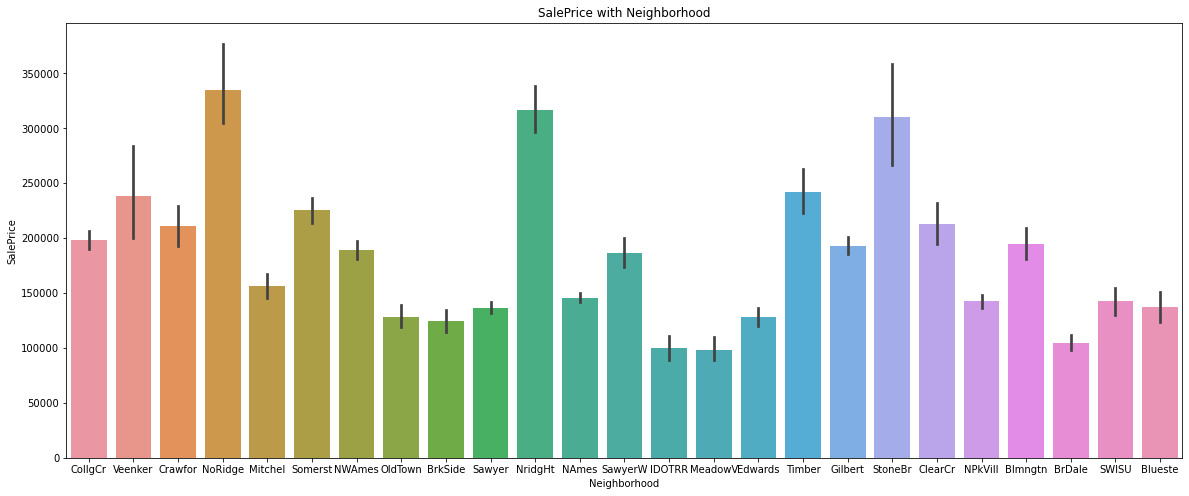

In [33]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=housing_df)
plt.title("SalePrice with Neighborhood")
plt.show()

#### So properties in neighbourhood NridgHt, NoRoidge, StoneBr are high than their corrsponding areas.

In [34]:
housing_df.OverallCond

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64

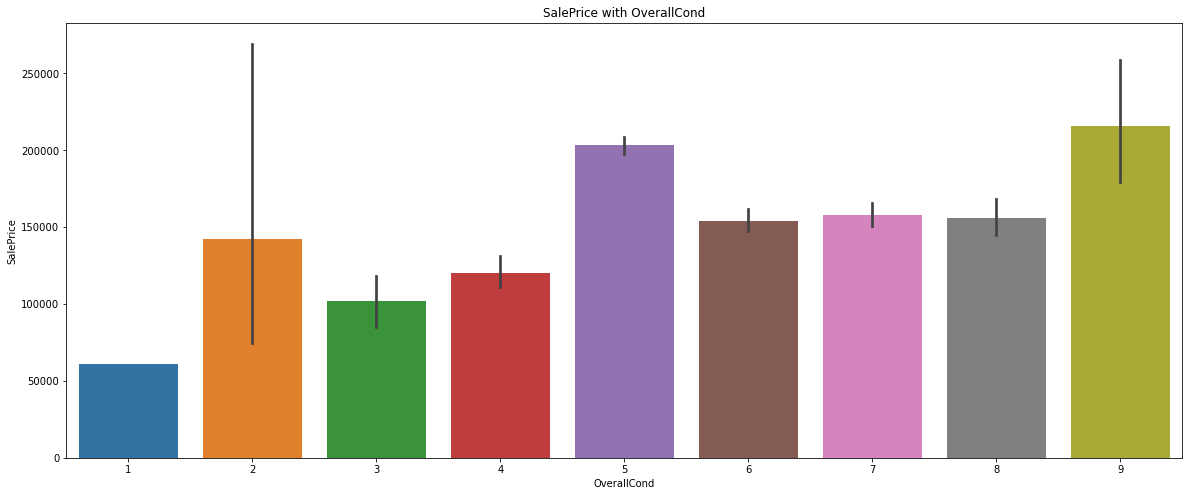

In [35]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data=housing_df)
plt.title("SalePrice with OverallCond")
plt.show()

### So homes having overall condition rating as 5 have higher price tha 6, 7 and 8, similarly condition having rating 2 price is high as compared to 3. Overall condition having rank 9 has highest price which is expected. There is no direct relation with overallcondition vs SalesPrice and there are other factors that exist to decide the Saleprice of the property.

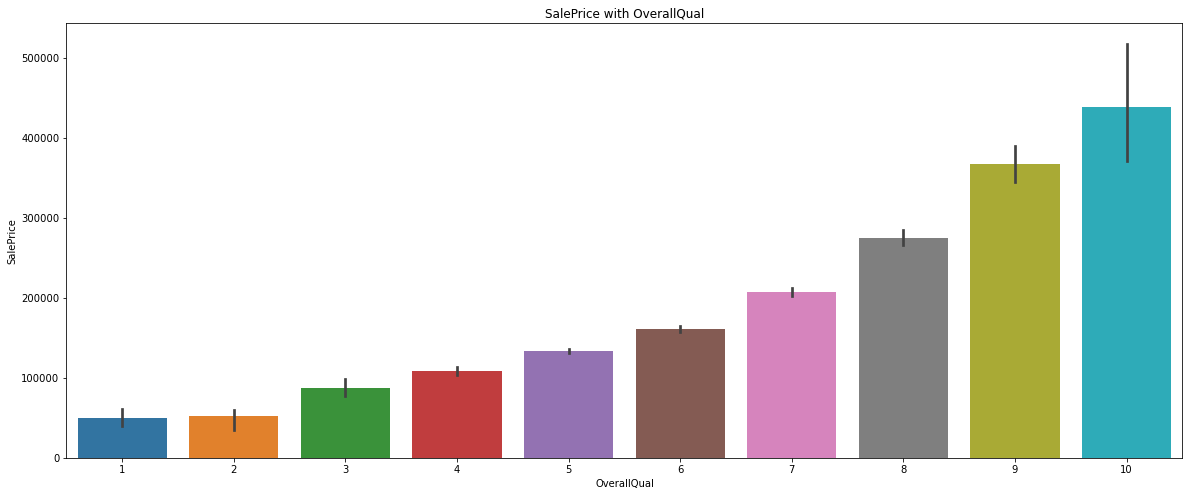

In [36]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data=housing_df)
plt.title("SalePrice with OverallQual")
plt.show()

###  This trend is quite expected and price is increasing when the overall quality ranking increases. By looking at the graph one can say that SalePrice is directly proportion to overall quality.

In [37]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(300, 180))
sns.barplot(x="YearBuilt", y="SalePrice", data=housing_df)
plt.title("SalePrice with YearBuilt")
plt.yticks(fontsize=150)
plt.xticks(rotation=90, fontsize=150)
plt.show()

#### With the year build increasing one can slightly see the upward trend in price increase

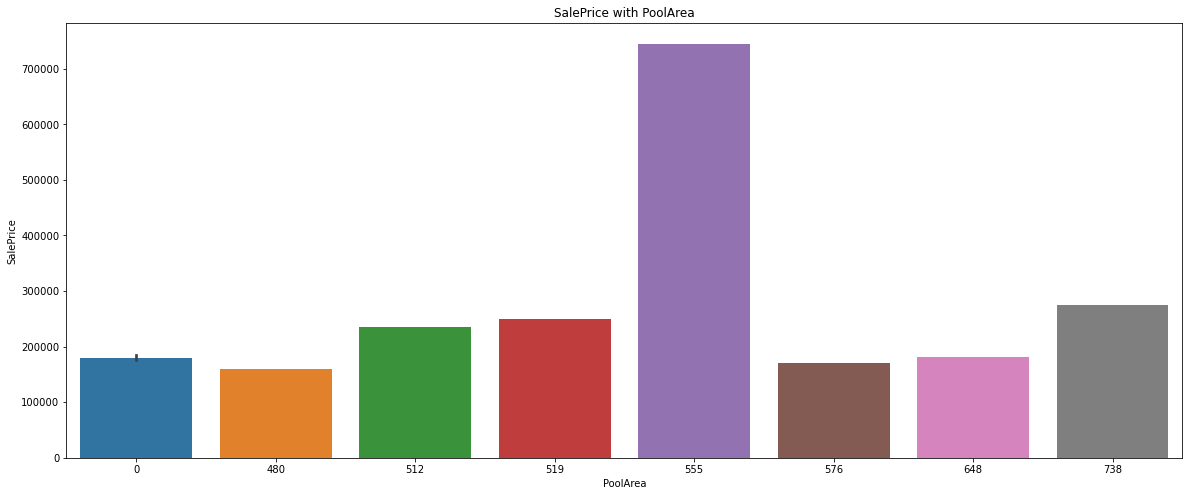

In [38]:
plt.figure(figsize=(20, 8))
sns.barplot(x="PoolArea", y="SalePrice", data=housing_df)
plt.title("SalePrice with PoolArea")
plt.show()

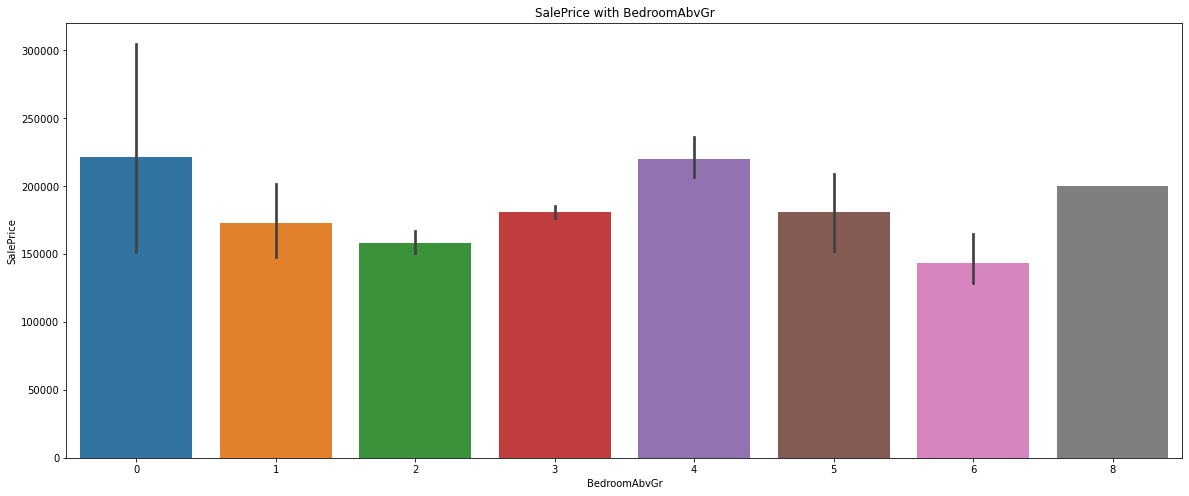

In [39]:

plt.figure(figsize=(20, 8))
sns.barplot(x="BedroomAbvGr", y="SalePrice", data=housing_df)
plt.title("SalePrice with BedroomAbvGr")
plt.show()

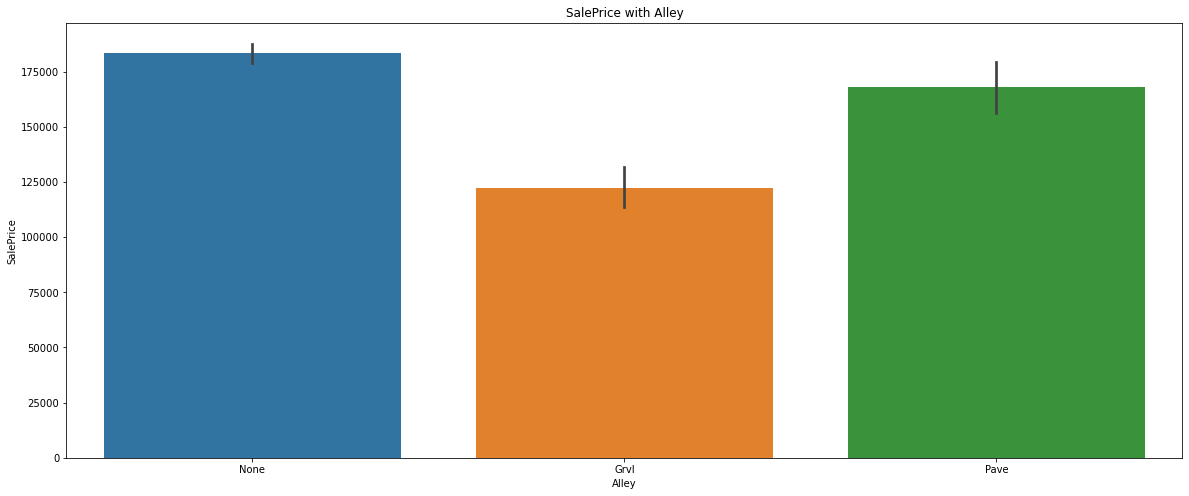

In [40]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Alley", y="SalePrice", data=housing_df)
plt.title("SalePrice with Alley")
plt.show()

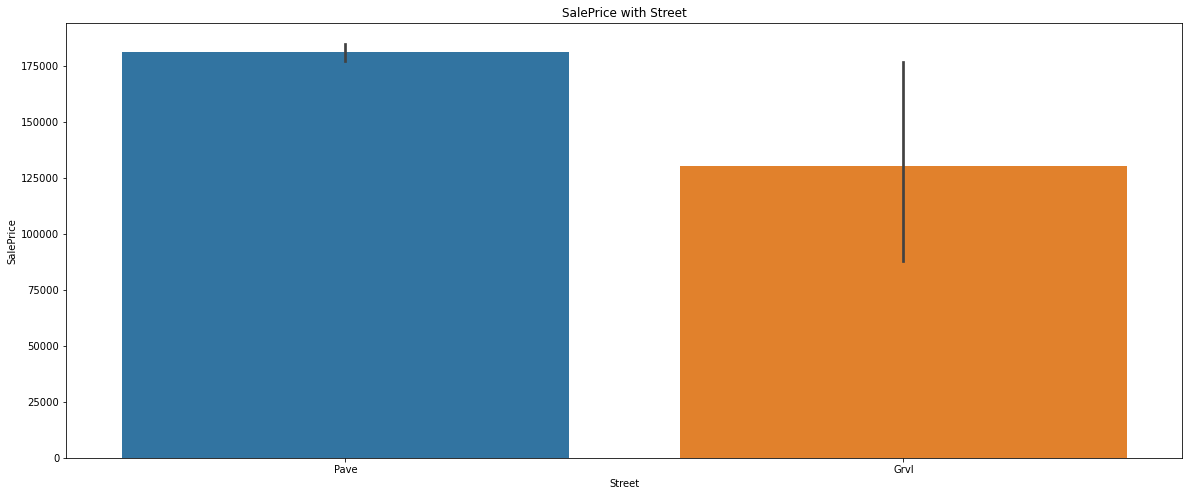

In [41]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Street", y="SalePrice", data=housing_df)
plt.title("SalePrice with Street")
plt.show()

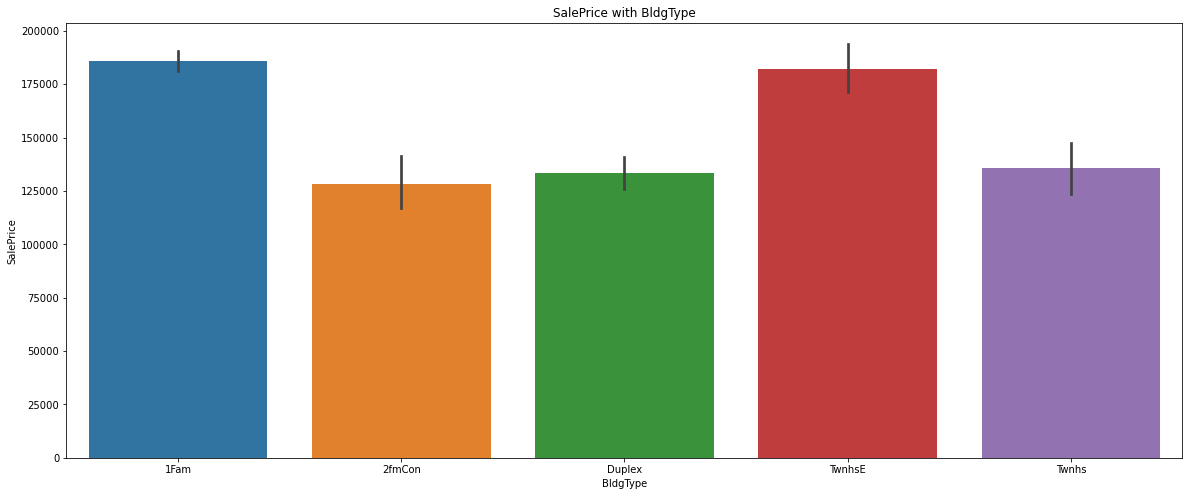

In [42]:
plt.figure(figsize=(20, 8))
sns.barplot(x="BldgType", y="SalePrice", data=housing_df)
plt.title("SalePrice with BldgType")
plt.show()

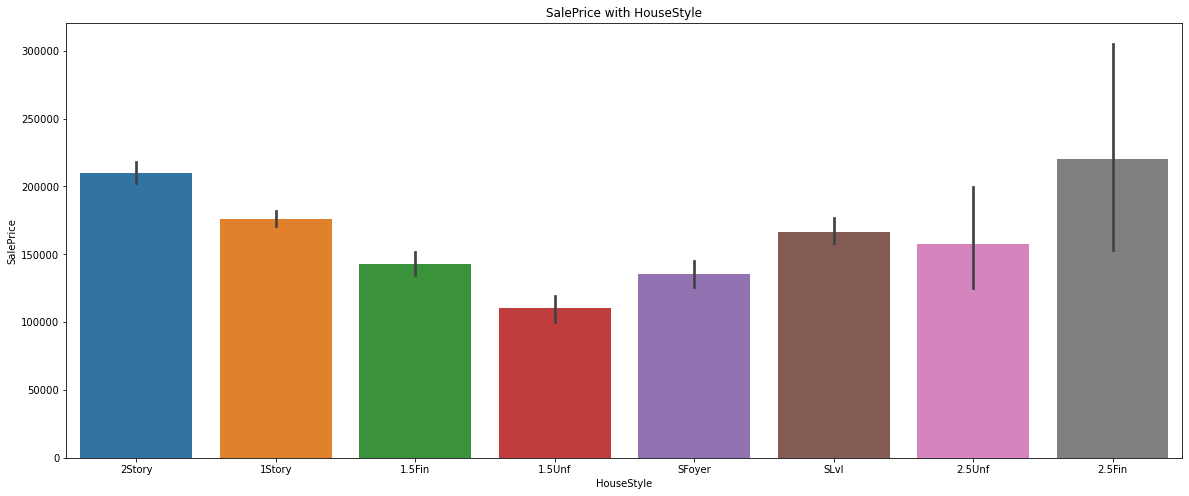

In [43]:
plt.figure(figsize=(20, 8))
sns.barplot(x="HouseStyle", y="SalePrice", data=housing_df)
plt.title("SalePrice with HouseStyle")
plt.show()

In [44]:
# Interesting facts with the HouseStyle vs SalePrice

In [45]:
correlation = housing_df.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


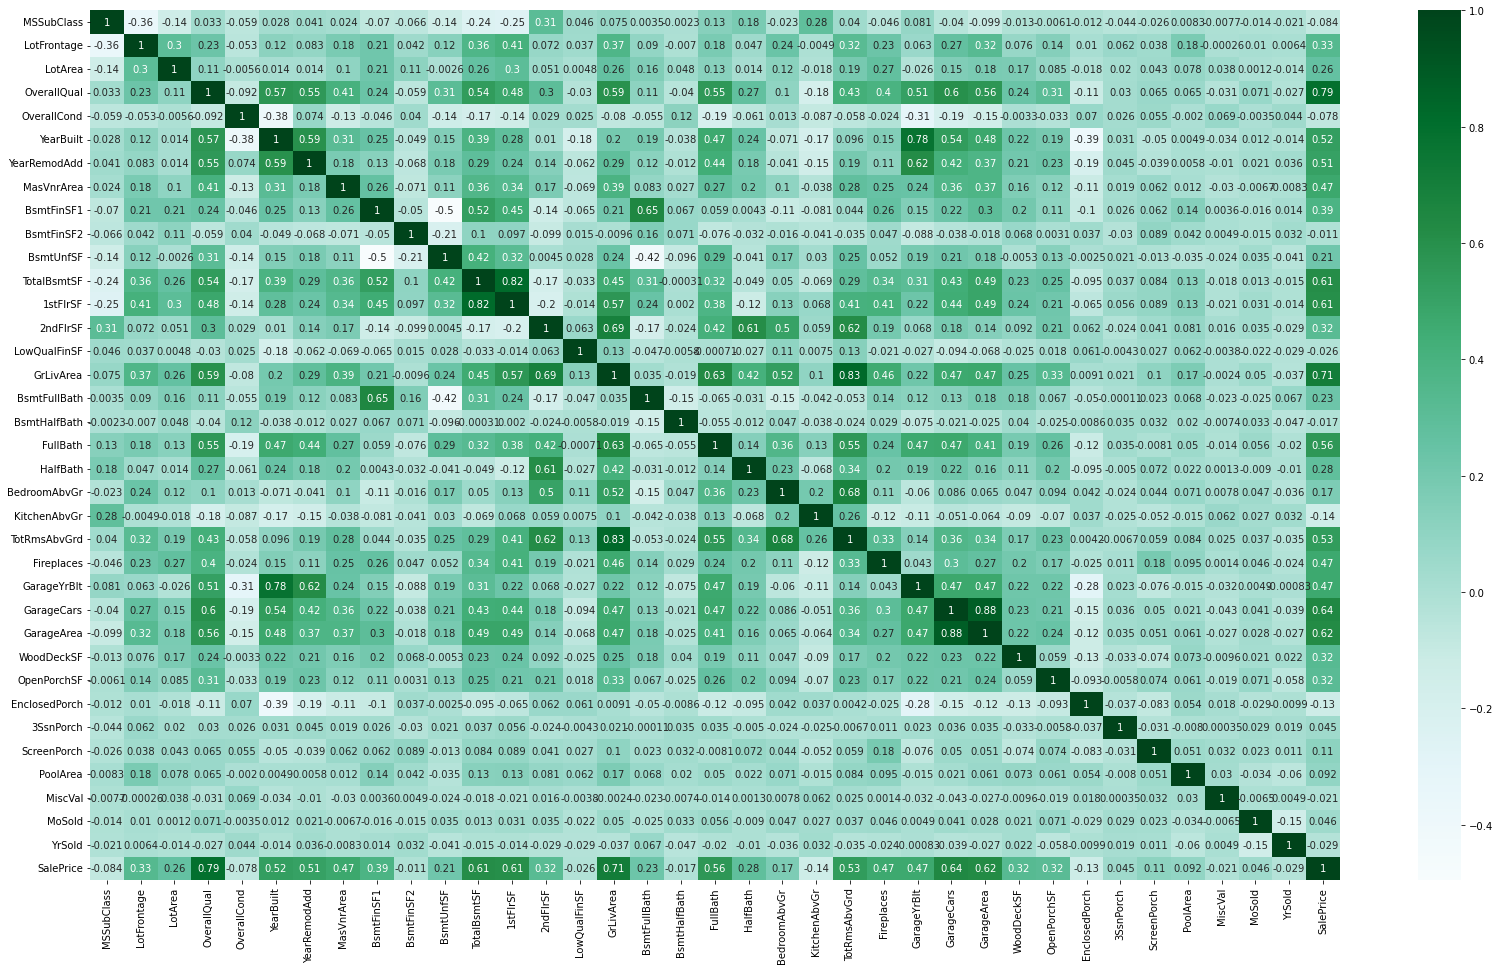

In [46]:
# Plot the heatmap

plt.figure(figsize=(28, 16))

#heatmap
sns.heatmap(correlation, cmap="BuGn", annot=True)
plt.show()


In [47]:
# GarageCar and GarageArea are highly correlated  88%
# TotRmsAbvGrd and GrLivArea are highly correlated 83%

In [48]:
# Remove the One of the attributes that are highy correlated to each other
housing_df.drop(columns=['GarageCars', 'GrLivArea'], axis=1, inplace=True)

In [49]:
housing_df.shape

(1460, 78)

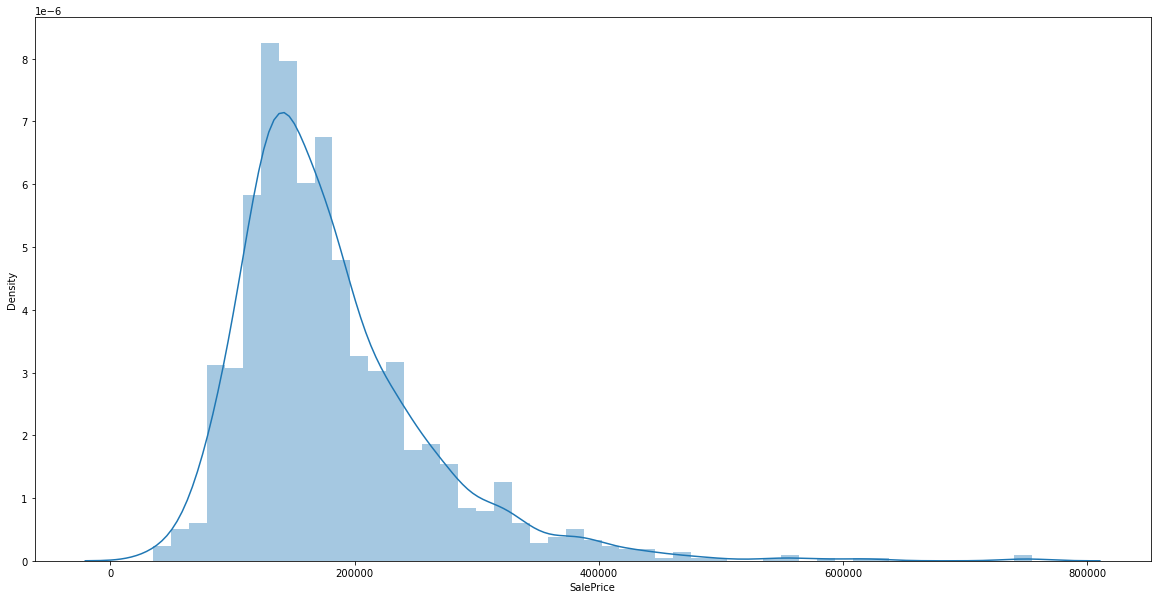

In [50]:
plt.figure(figsize=(20, 10))
sns.distplot(housing_df['SalePrice'])
plt.show()

In [51]:
# SalePrice is data accumulated towards leftside more, let's apply log transformation to obtain a centralized data
housing_df['SalePrice'] = np.log1p(housing_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

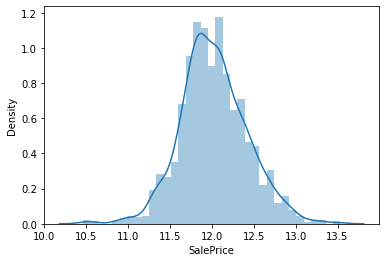

In [52]:
sns.distplot(housing_df['SalePrice'])

<AxesSubplot:ylabel='SalePrice'>

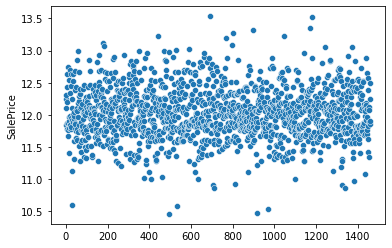

In [53]:
sns.scatterplot(data=housing_df['SalePrice'])

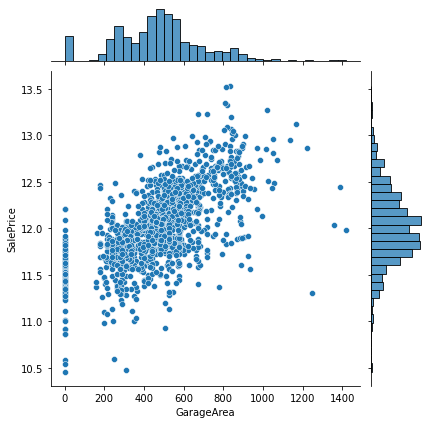

In [54]:
# Analysing numerical columns 

sns.jointplot(x='GarageArea', y='SalePrice', data=housing_df)

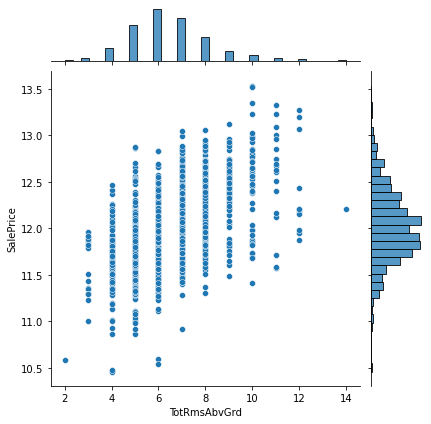

In [55]:
sns.jointplot(x='TotRmsAbvGrd', y='SalePrice', data=housing_df)

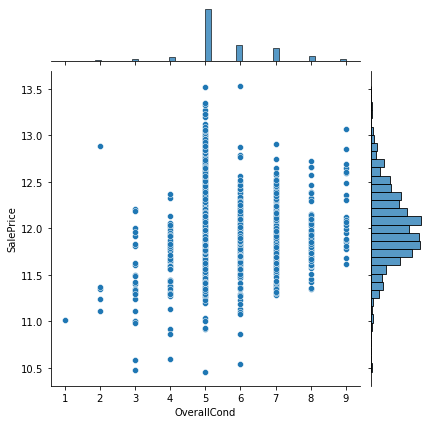

In [56]:
sns.jointplot(x='OverallCond', y='SalePrice', data=housing_df)

##  Step 4
### Data Preparation 
* Creatiing Dummies 

In [57]:
housing_df = pd.get_dummies(housing_df, drop_first=True)
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
y = housing_df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [60]:
# Splittig the data into train and test 
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [76]:
numeric_feature = X_train.select_dtypes(include=['int64', 'float64'])
numeric_feature = numeric_feature.columns.to_list()

numeric_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [77]:
# Apply scaling to the training and testing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numeric_feature] = scaler.fit_transform(X_train[numeric_feature])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.637608,0.166080,-0.059996,1.252715,-0.688358,0.773891,-0.575015,0.085426,-0.283127,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.424957,-0.261043,-1.501313,1.252715,-1.999823,-1.680267,-0.575015,-0.943351,-0.283127,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.026495,-0.439778,0.660663,1.252715,-1.475237,-1.680267,-0.575015,-0.943351,-0.283127,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.239147,0.079341,-0.780655,-1.406374,-0.196559,-0.958456,-0.575015,0.870488,-0.283127,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.150599,-0.151525,0.660663,-0.520011,1.147692,1.014495,-0.575015,-0.943351,-0.283127,...,0,0,1,0,0,0,0,0,0,1


###  Model Building And Evaluation

#### Lets use the RFE feature to get the best 100 features out of 258 features that we have with us

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [82]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe_features = RFE(lm, n_features_to_select=100)
rfe_features = rfe_features.fit(X_train, Y_train)

In [83]:
list(zip(X_train.columns, rfe_features.support_, rfe_features.ranking_))

[('MSSubClass', False, 152),
 ('LotFrontage', False, 52),
 ('LotArea', False, 24),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 40),
 ('MasVnrArea', False, 120),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 125),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 140),
 ('FullBath', False, 89),
 ('HalfBath', False, 100),
 ('BedroomAbvGr', False, 148),
 ('KitchenAbvGr', False, 84),
 ('TotRmsAbvGrd', False, 132),
 ('Fireplaces', False, 154),
 ('GarageYrBlt', False, 114),
 ('GarageArea', False, 12),
 ('WoodDeckSF', False, 104),
 ('OpenPorchSF', False, 109),
 ('EnclosedPorch', False, 107),
 ('3SsnPorch', False, 130),
 ('ScreenPorch', False, 94),
 ('PoolArea', False, 43),
 ('MiscVal', False, 69),
 ('MoSold', False, 146),
 ('YrSold', False, 144),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),


In [85]:
select_columns = X_train.columns[rfe_features.support_]
select_columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Condition1_Norm', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_Twnhs',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_I

In [86]:
# Select the columsn that RFE is suggesting 
X_train_rfe = X_train[select_columns]

X_train_rfe

,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSZoning_FV,...,PoolQC_None,MiscFeature_Othr,SaleType_Con,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
175,-0.059996,1.252715,-0.688358,0.085426,-0.283127,0.361507,0.347365,2.572160,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1
1408,-1.501313,1.252715,-1.999823,-0.943351,-0.283127,0.126620,-0.973680,-1.069794,0.630928,0,...,1,0,0,0,0,0,0,0,0,1
1148,0.660663,1.252715,-1.475237,-0.943351,-0.283127,0.012597,-1.087563,-1.504156,0.440311,0,...,1,0,0,0,0,0,0,0,0,1
861,-0.780655,-1.406374,-0.196559,0.870488,-0.283127,-0.840294,-0.023894,-0.303879,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1
220,0.660663,-0.520011,1.147692,-0.943351,-0.283127,2.124300,1.021554,0.875837,-0.797551,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.059996,0.366352,0.229667,0.760493,0.728419,0.051365,1.121771,2.353694,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1
229,0.660663,-0.520011,1.114905,-0.908843,-0.283127,1.802756,0.736846,1.022338,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1
70,0.660663,0.366352,0.065734,3.111366,-0.283127,-0.509627,2.672860,2.739222,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1
132,-0.780655,0.366352,-0.393279,-0.069861,-0.283127,0.208717,0.030770,0.436335,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1


In [87]:
X_train_rfe.shape

(1021, 100)

In [88]:
# lets do one rond of prediction 

y_train_pred = lm.predict(X_train)

In [90]:
from sklearn import metrics

metrics.r2_score(Y_train, y_train_pred)

0.9417187291062075

In [91]:
x_test[numeric_feature] = scaler.transform(x_test[numeric_feature])
x_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.870387,0.150599,-0.157219,1.381321,-0.520011,1.180479,1.062616,-0.575015,-0.908843,-0.283127,...,0,0,0,0,1,0,0,0,1,0
530,0.539820,0.681882,-0.045510,-0.059996,-0.520011,0.557533,0.196442,0.665496,0.745395,-0.283127,...,0,0,0,0,1,0,0,0,0,0
1291,2.420095,-2.151625,-0.791991,-0.780655,1.252715,0.032947,-0.621611,0.943053,-0.445138,-0.283127,...,0,0,0,0,1,0,0,0,1,0
1385,-0.165284,-1.310428,-0.462909,-1.501313,2.139077,-1.606384,1.062616,-0.575015,0.641871,-0.283127,...,0,0,0,0,1,0,0,0,1,0
305,-0.870387,0.460514,-0.029214,1.381321,-0.520011,1.082119,0.966374,0.818435,2.214152,-0.283127,...,0,0,0,0,1,0,0,0,1,0


In [92]:
y_test_predict = lm.predict(x_test)

In [93]:
metrics.r2_score(y_test, y_test_predict)

-2.128860041789836e+22

In [ ]:
# Now the test is too less try some regression method to solve this

In [94]:
list(zip(x_test.columns, rfe_features.support_, rfe_features.ranking_))

[('MSSubClass', False, 152),
 ('LotFrontage', False, 52),
 ('LotArea', False, 24),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 40),
 ('MasVnrArea', False, 120),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 125),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 140),
 ('FullBath', False, 89),
 ('HalfBath', False, 100),
 ('BedroomAbvGr', False, 148),
 ('KitchenAbvGr', False, 84),
 ('TotRmsAbvGrd', False, 132),
 ('Fireplaces', False, 154),
 ('GarageYrBlt', False, 114),
 ('GarageArea', False, 12),
 ('WoodDeckSF', False, 104),
 ('OpenPorchSF', False, 109),
 ('EnclosedPorch', False, 107),
 ('3SsnPorch', False, 130),
 ('ScreenPorch', False, 94),
 ('PoolArea', False, 43),
 ('MiscVal', False, 69),
 ('MoSold', False, 146),
 ('YrSold', False, 144),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),


In [95]:
x_test_columns = x_test.columns[rfe_features.support_]
x_test_columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Condition1_Norm', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_Twnhs',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_I

In [96]:
x_test_rfe = x_test[x_test_columns]

In [97]:
x_test_rfe.head()

,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSZoning_FV,...,PoolQC_None,MiscFeature_Othr,SaleType_Con,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
930,1.381321,-0.520011,1.180479,-0.908843,-0.283127,2.014838,0.948668,0.793591,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1
530,-0.059996,-0.520011,0.557533,0.745395,-0.283127,0.254326,0.937280,0.904109,-0.797551,0,...,1,0,0,0,0,0,0,0,0,0
1291,-0.780655,1.252715,0.032947,-0.445138,-0.283127,-0.381922,-0.955459,-1.355085,0.745757,0,...,1,0,0,0,0,0,0,0,0,1
1385,-1.501313,2.139077,-1.606384,0.641871,-0.283127,-1.152716,-0.577367,-0.928434,0.024628,0,...,1,0,0,0,0,0,0,0,0,1
305,1.381321,-0.520011,1.082119,2.214152,-0.283127,-0.069499,2.164941,2.166071,-0.797551,0,...,1,0,0,0,0,0,0,0,0,1


###  Lasso and Ridge Regression 

In [98]:
# Let's predict the house prices using lasso and ridge regression 

In [99]:
print(X_train.shape)
print(Y_train.shape)

(1021, 258)
(1021,)


In [101]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [102]:
# Applyin lasso 

params = {'alpha': [0.005, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
          0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
         }

lasso = Lasso()

# cross validation

folds = 5 
model_cv = GridSearchCV(estimator=lasso, 
                       param_grid=params,
                       scoring="neg_mean_absolute_error",
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0,
                                   20.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results = cv_results[cv_results['param_alpha']<=1]
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007000,8.948427e-04,0.001800,0.000400,0.005,{'alpha': 0.005},-0.104918,-0.093333,-0.098008,-0.108276,...,-0.098429,0.007513,2,-0.094617,-0.097474,-0.093558,-0.083274,-0.096096,-0.093004,0.005043
1,0.010999,1.095410e-03,0.001800,0.000400,0.001,{'alpha': 0.001},-0.086017,-0.076983,-0.089794,-0.102804,...,-0.087124,0.009027,1,-0.076052,-0.078992,-0.075762,-0.071936,-0.075487,-0.075646,0.002243
2,0.005400,4.896874e-04,0.001800,0.000400,0.05,{'alpha': 0.05},-0.140453,-0.126089,-0.134326,-0.143127,...,-0.133147,0.008177,4,-0.131836,-0.134657,-0.132051,-0.125364,-0.134877,-0.131757,0.003438
3,0.006000,8.259062e-07,0.001600,0.000490,0.01,{'alpha': 0.01},-0.108651,-0.099528,-0.099822,-0.110975,...,-0.101949,0.007236,3,-0.099283,-0.102360,-0.099003,-0.087481,-0.101105,-0.097846,0.005326
4,0.005001,2.866581e-06,0.001799,0.000399,0.1,{'alpha': 0.1},-0.174411,-0.153616,-0.178671,-0.190655,...,-0.171232,0.013472,5,-0.170203,-0.170853,-0.168835,-0.169994,-0.172354,-0.170448,0.001154


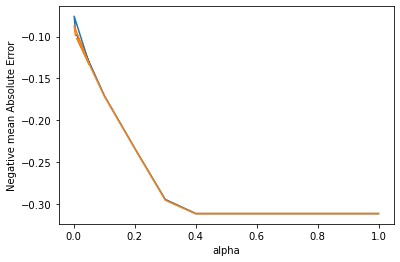

In [107]:
# Plotting mean test and train with Alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean Absolute Error')

plt.show()

In [ ]:
# We can see that Mean Absolute Error is quite low at alpha = 0.4 and stabilises from there on. Buts lets choose even smaller
# value of alpha say 0.01

In [108]:
alpha = 0.01

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, Y_train)

lasso.coef_

array([-0.01432545,  0.        ,  0.01615059,  0.12953725,  0.03600809,
        0.05999025,  0.03543686,  0.        ,  0.01173739,  0.        ,
       -0.        ,  0.01979274,  0.0617651 ,  0.05173588,  0.        ,
        0.0243922 ,  0.        ,  0.02611833,  0.01243965,  0.        ,
       -0.00947517,  0.03111584,  0.03078592,  0.        ,  0.04730058,
        0.00820442,  0.        ,  0.        ,  0.        ,  0.00836131,
       -0.01475319, -0.        ,  0.        , -0.00033627,  0.        ,
        0.        ,  0.00815947, -0.00396299,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

In [ ]:
# Here we can see that Lasso brings coeffiecients of insignificant features to Zero 

In [109]:
y_train_pred_lasso = lasso.predict(X_train)

metrics.r2_score(Y_train, y_train_pred_lasso)


0.863148666947944

In [110]:
y_test_predict_lasso = lasso.predict(x_test)
metrics.r2_score(y_test, y_test_predict_lasso)

0.8471576211223955

In [ ]:
# Now Here we can see that Train and Test matches well and we can say it's good match to go ahead

In [111]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_lasso))

rmse

0.15534978053646922